<div dir="rtl" align="center">
<font face="XB Zar" size=5>
    <font face="IranNastaliq" size=5>
      به نام خدا
    </font>
    <br>
    <font size=3>
      دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
    </font>
    <br>
    <font color=blue size=5>
      مقدمه‌ای بر یادگیری ماشین
    </font>
    <br>
    <hr/>
    <font color=red size=6>
      فصل سوم: ارزیابی
    </font>
    <br>
      نویسندگان:‌ پیمان ناصری<br>
    علیرضا گرگوری مطلق
    <hr>
<br>
</font>
</div>

<div><font face="XB Zar" size=5><div dir=rtl>
- انگیزه: بهترین مرز جدا کننده 
<div>

In [47]:
#import necessary package and define use function

%matplotlib nbagg

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# # our libraries
# from utils import plot_svc_decision_function

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    
    # plot the margins
    ax.contour(X, Y, P, colors='k', 
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
 

<div dir=rtl>

## انگیزه : بهترین مرز جدا کننده

<div><font face="XB Zar" size=5><div dir=rtl>
ما به دنبال بهترین مرز جدا کننده هستیم اما این بهترین مرز چیست و چگونه پیدا میشود؟
<div>

<div><font face="XB Zar" size=5><div dir=rtl>

### ایجاد دیتاست
<div>


<font face="XB Zar" size=5><div dir=rtl>
برای درک این سوال از یک دیتاست مصنوعی استفاده می‌استفاده می‌کنیم.


<IPython.core.display.Javascript object>


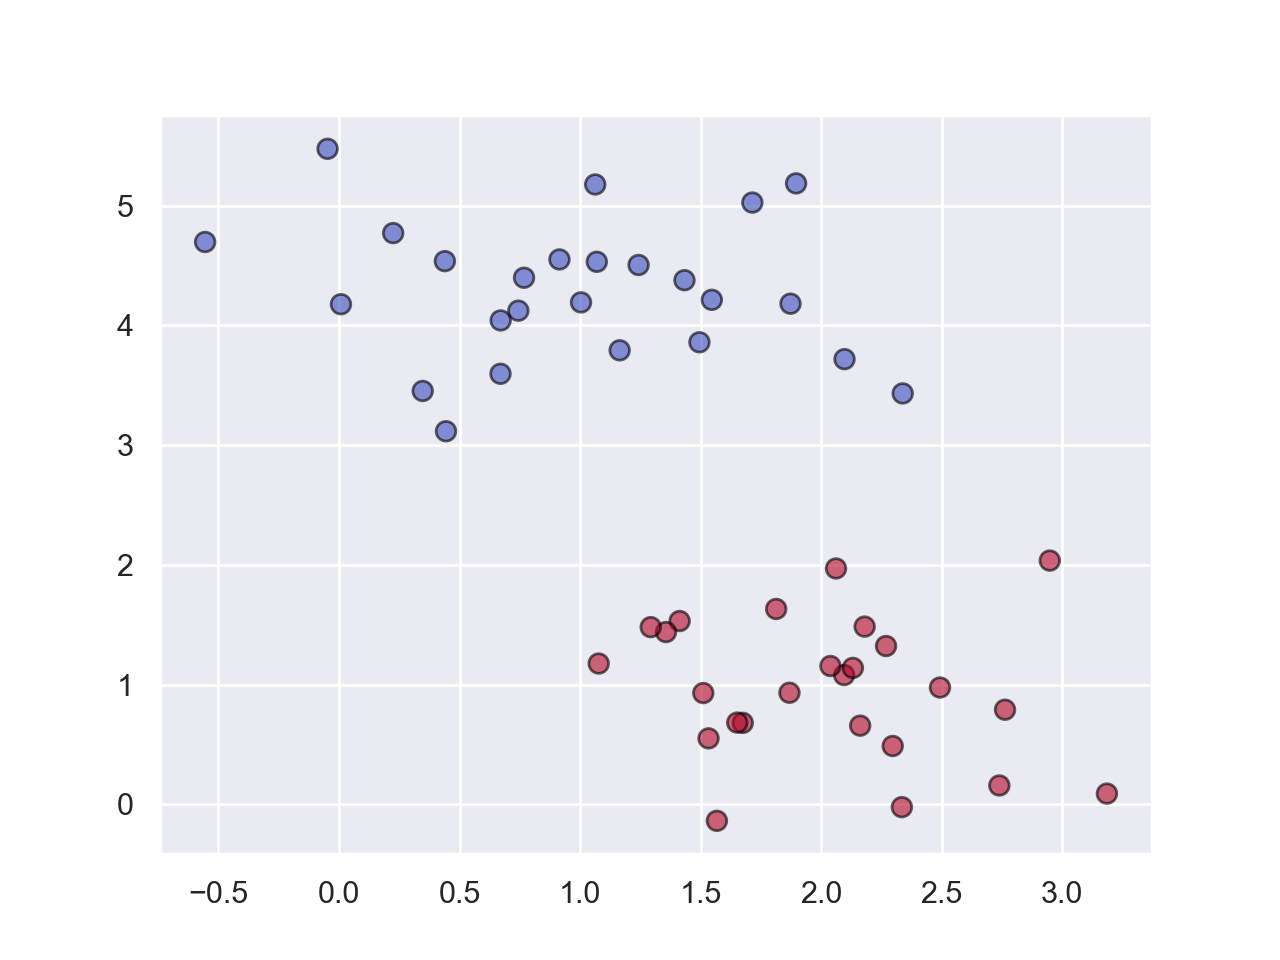

In [48]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.6)
plt.show()

<div><font face="XB Zar" size=5><div dir=rtl>

### مرز جداکننده
<div>

ِ<div><font face="XB Zar" size=5><div dir=rtl>
هنگامی که داده ها به صورت **خطی قابل تفکیک** (linearly separable)هستند، می توان مرزهای تصمیم خطی مختلف را ترسیم کرد که همه آنها به درستی داده های آموزشی را طبقه بندی می کنند.<div>
ِ<div><font face="XB Zar" size=5><div dir=rtl> 
اما سوال مهم این است که کدام یک بهتر است؟
<div>

<IPython.core.display.Javascript object>


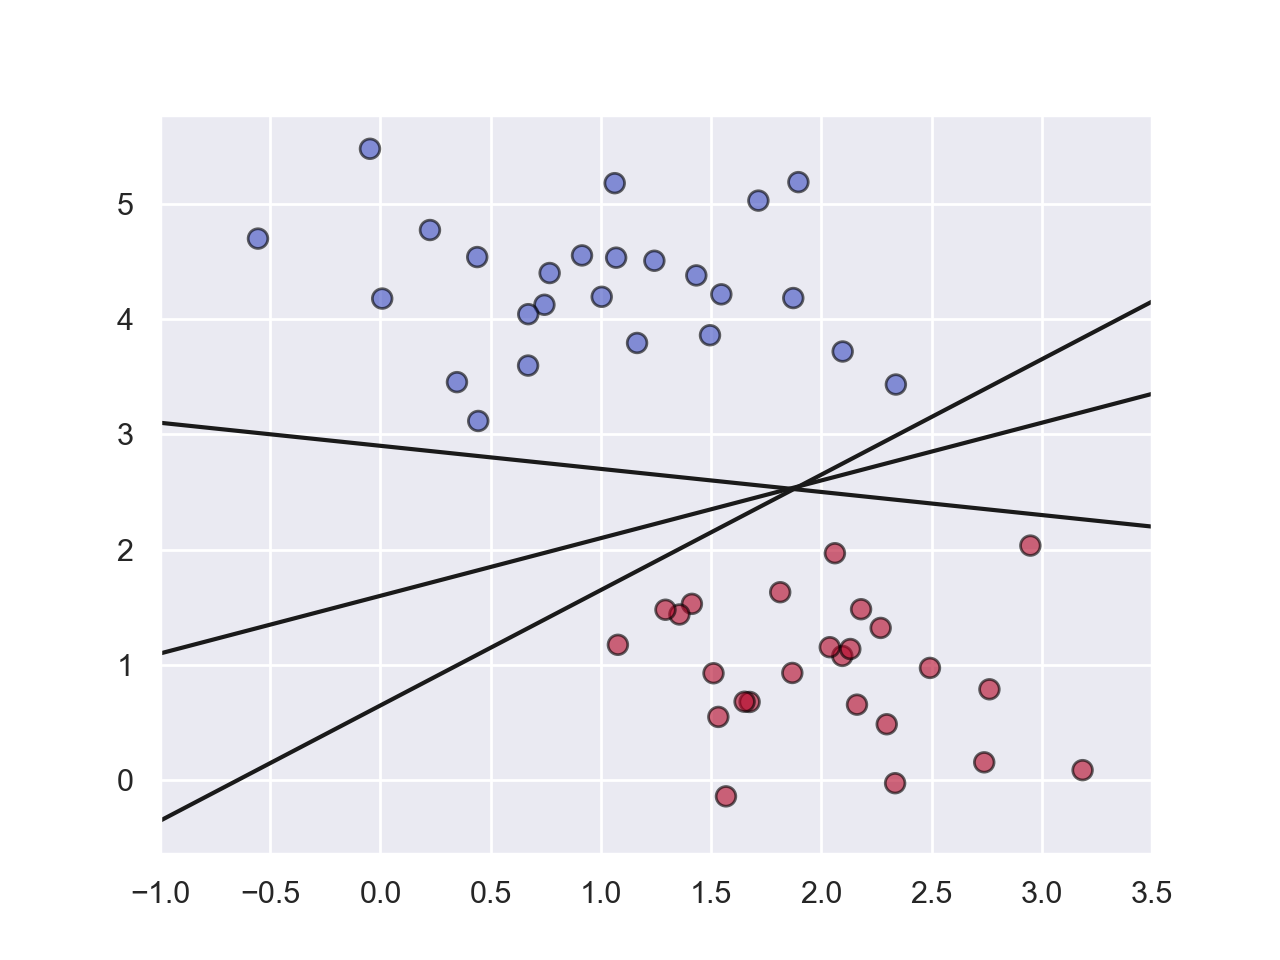

In [49]:
# plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)

# draw three different separators
x_values = np.linspace(-1, 3.5)
for w, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(x_values, w * x_values + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

<div><font face="XB Zar" size=5><div dir=rtl>

### بیشینه حاشیه مرزی
    
<div>

ِ<div><font face="XB Zar" size=5><div dir=rtl>
اگر فاصله نزدیک‌ترین نقطه به مرز را حاشیه مرزی بنامیم بهتریم خط آن خطی است که این فاصله را بیشینه می‌کند. 
<div>

<IPython.core.display.Javascript object>


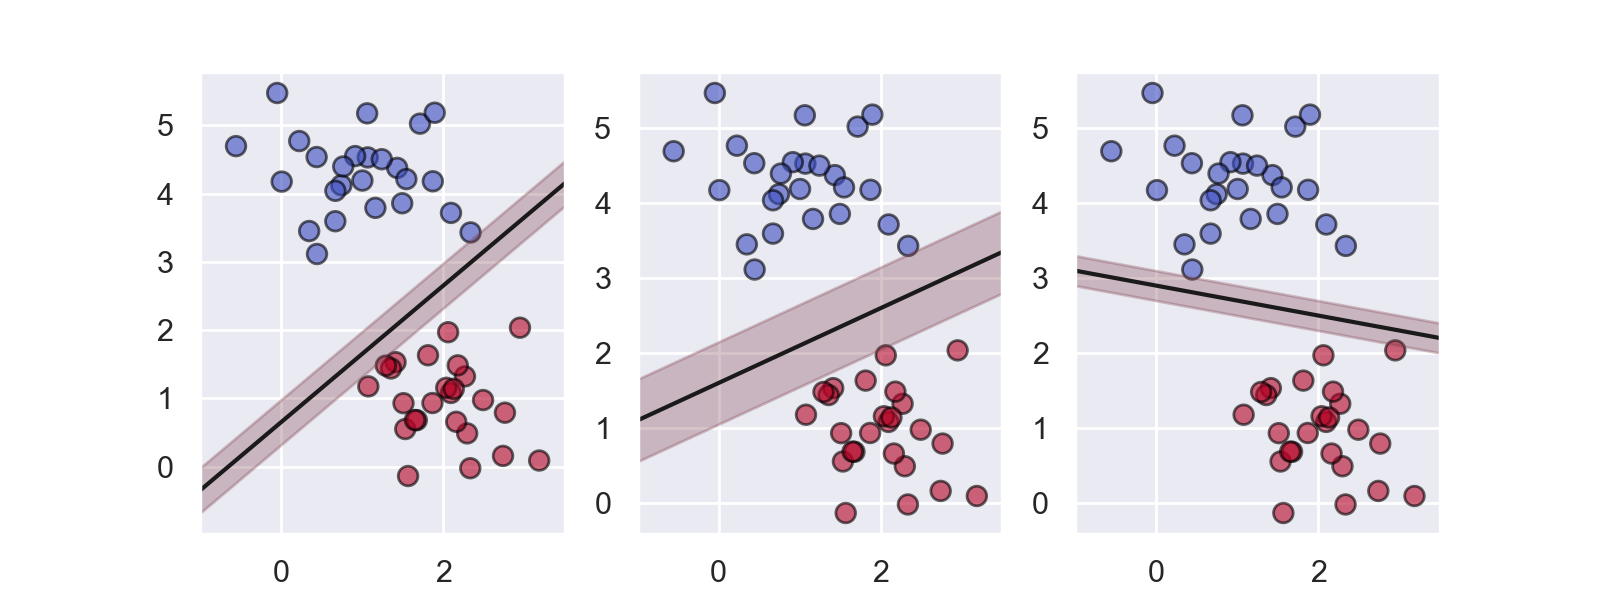

In [50]:
plt.figure(figsize=(8, 3))

# draw separators and margins
x_values = np.linspace(-1, 3.5)
for i, (w, b, m) in enumerate([(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]):
    plt.subplot(1, 3, i + 1)
    
    # draw data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    y_values = w * x_values + b
    
    # draw separator and margin
    plt.plot(x_values, y_values, '-k')
    plt.fill_between(x_values, y_values - m, y_values + m, edgecolor='none', color='#7D3C4A', alpha=0.3)
    plt.xlim(-1, 3.5)

plt.show()

<div><font face="XB Zar" size=5><div dir=rtl>

### برازش مدل
    
<div>

ِ<div><font face="XB Zar" size=5><div dir=rtl>
ابتدا از پکیج آماده ``scikit-learn`` برای برزاش این مدل استفاده می‌کنیم
    
<div>

In [51]:
from sklearn.svm import SVC

# create Support Vector Classifier using a linear kernel
clf = SVC(kernel='linear')

# train the classifier
clf.fit(X, y)

SVC(kernel='linear')

<IPython.core.display.Javascript object>


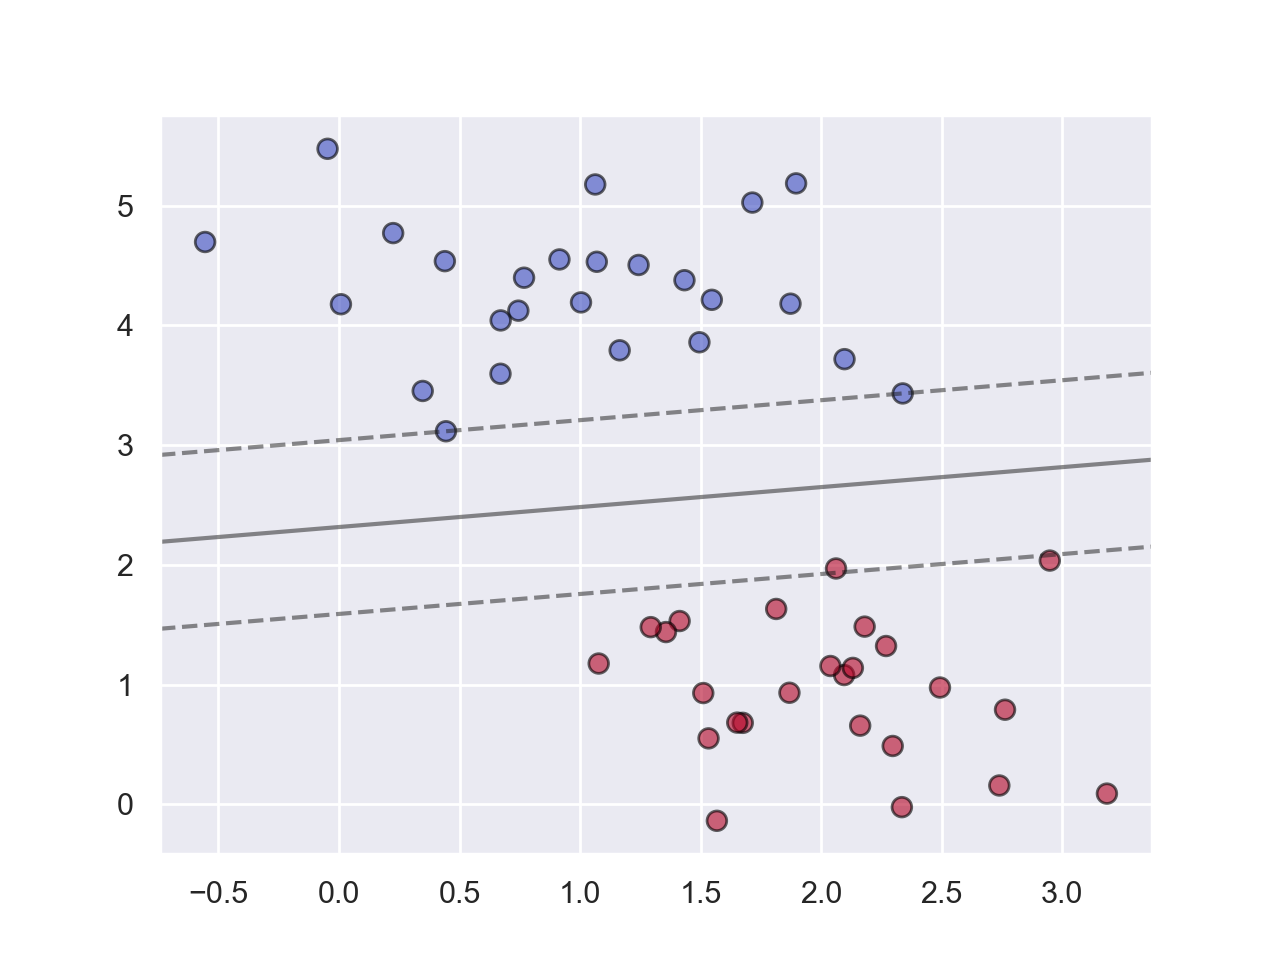

In [52]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.show()

<div><font face="XB Zar" size=5><div dir=rtl>

### بردار‌های پشتیبان
    
<div>

ِ<div><font face="XB Zar" size=5><div dir=rtl>
به این نقاطی که در دو طرف روی مرز قرار میگیریند بردار پشتیبان گفته می‌شود. (به طور شهودی واضح است که معادله خط جدا کننده فقط به این نقاط مرزی بستگی دارد هرچند این قضیه اثبات دقیق دارد)    
<div>


ِ<div><font face="XB Zar" size=5><div dir=rtl>
در پکیج ``scikit-learn`` این بردار‌ها در ``support_vectors_`` ذخیره می‌شوند.

<IPython.core.display.Javascript object>


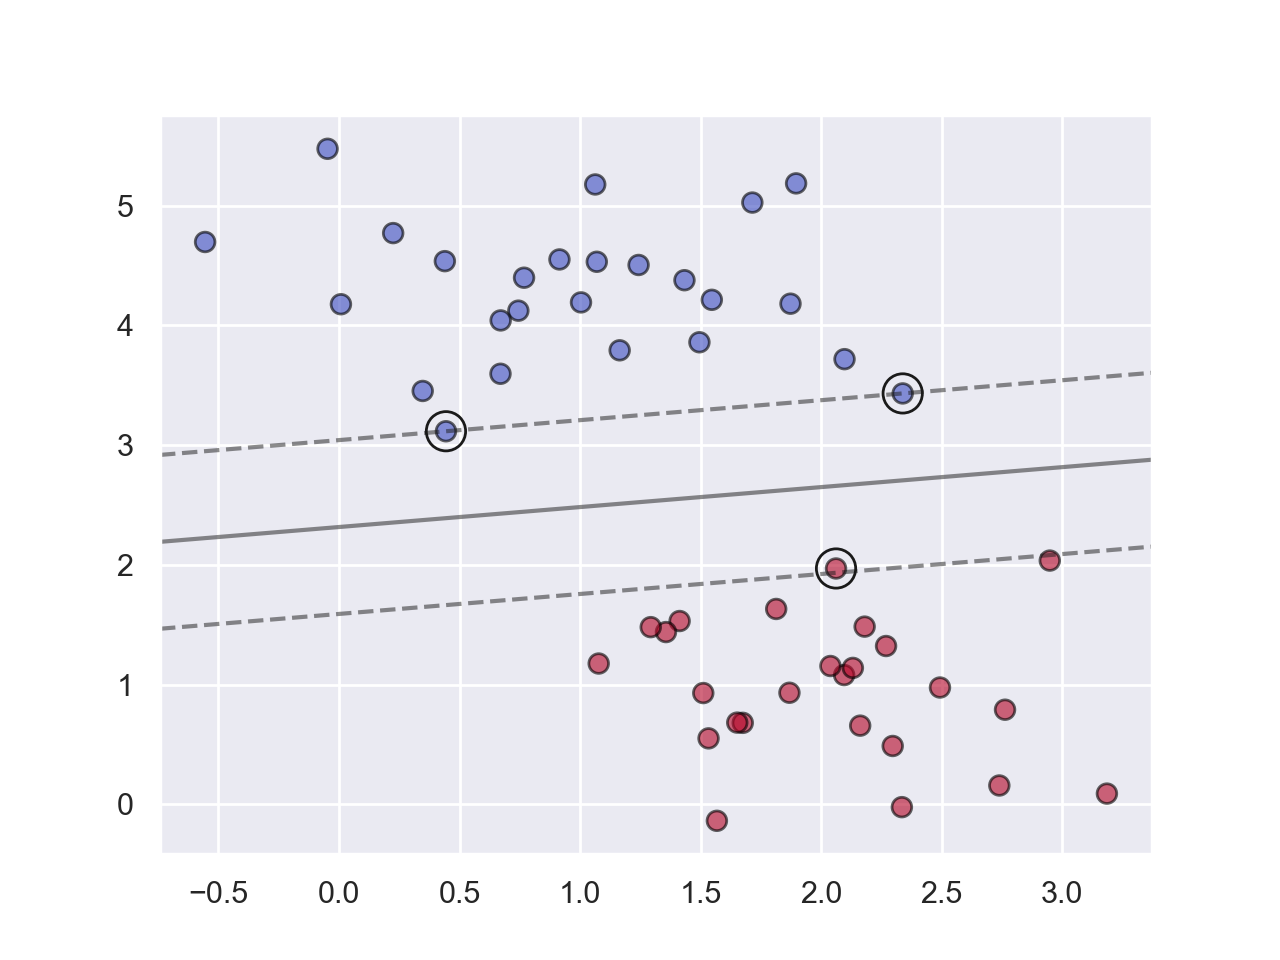

In [53]:
plt.figure()
# plot data and margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');

<div><font face="XB Zar" size=5><div dir=rtl>

### دو تا مشکل
    
<div>

ِ<div><font face="XB Zar" size=5><div dir=rtl>
یک : خط بهینه به نقاط مرزی وابسته اس بنابرین تغییر کوچکی در هر یک از آن‌ها معادله خط جدا کننده را تحت تاثیر شدید قرار می‌دهد. یعنی این مدل به شدت قابلیت بیش برازش دارد.

In [54]:
del clf
from sklearn.svm import SVC

# create Support Vector Classifier using a linear kernel
clf = SVC(C=100,kernel='linear')

#add noisy data
X =  np.concatenate((X,[[2.5,3]]), axis=0)
y = np.append(y,1)

# train the classifier
clf.fit(X, y)

SVC(C=100, kernel='linear')

<IPython.core.display.Javascript object>


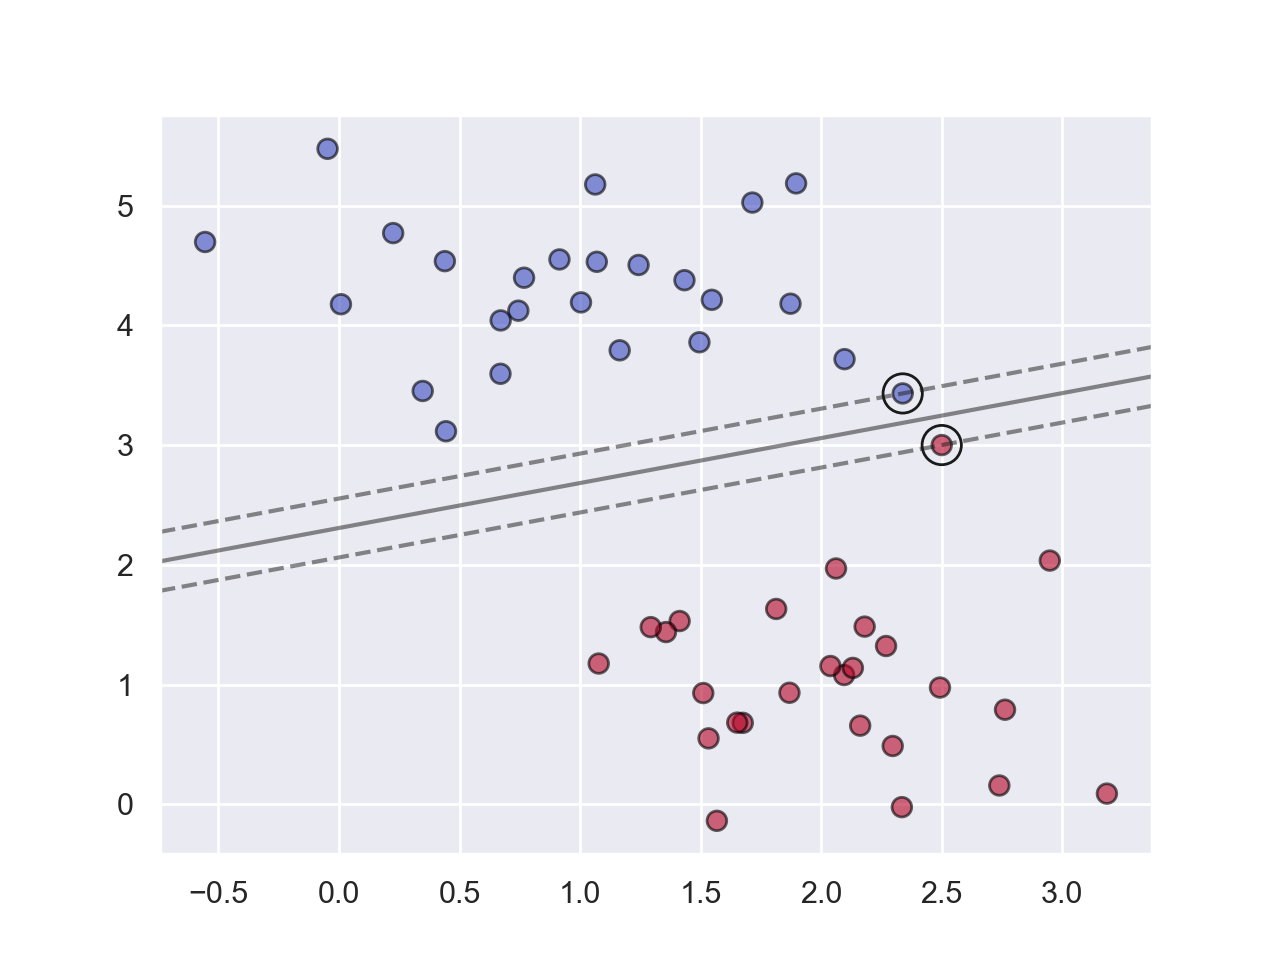

In [55]:
plt.figure()
# plot data and margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');

<div><font face="XB Zar" size=5><div dir=rtl>

#### soft margin
    
<div>

ِ<div><font face="XB Zar" size=5><div dir=rtl>
برای حل این مشکل میتوانیم کمی کمتر سخت‌گیرانه برخورد کنیم.


In [66]:
del clf
from sklearn.svm import SVC

# create Support Vector Classifier using a linear kernel
clf = SVC(C=1,kernel='linear')

# train the classifier
clf.fit(X, y)

SVC(C=1, kernel='linear')

<IPython.core.display.Javascript object>


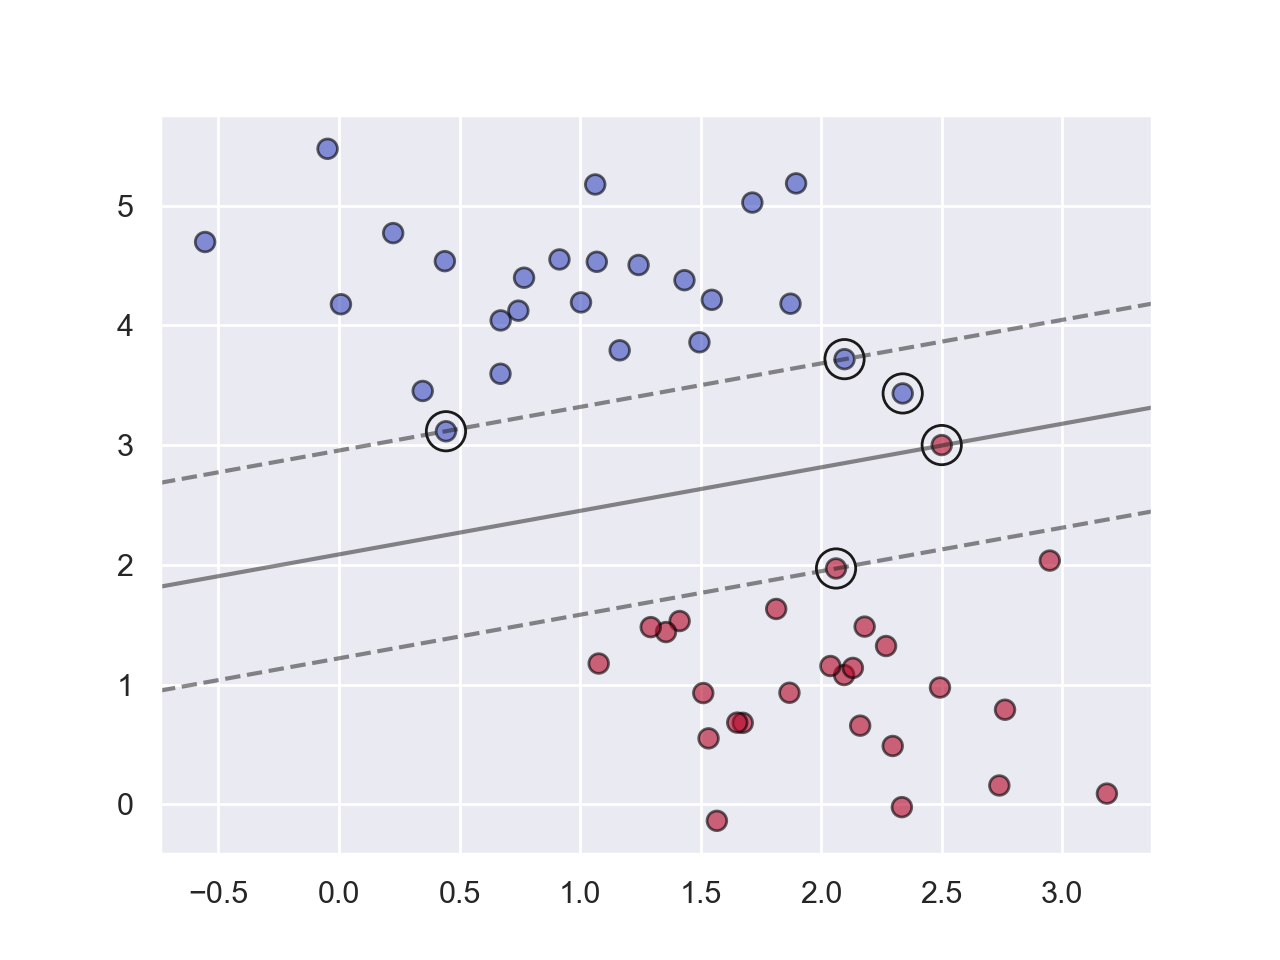

In [67]:
plt.figure()
# plot data and margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');

ِ<div><font face="XB Zar" size=5><div dir=rtl>
دو : گاهی ممکن است اصلا مرز خطی تفکیک پذیر نباشد و میبایست از یک منحنی به عنوان مرز جداساز استفاده کنیم.



<IPython.core.display.Javascript object>


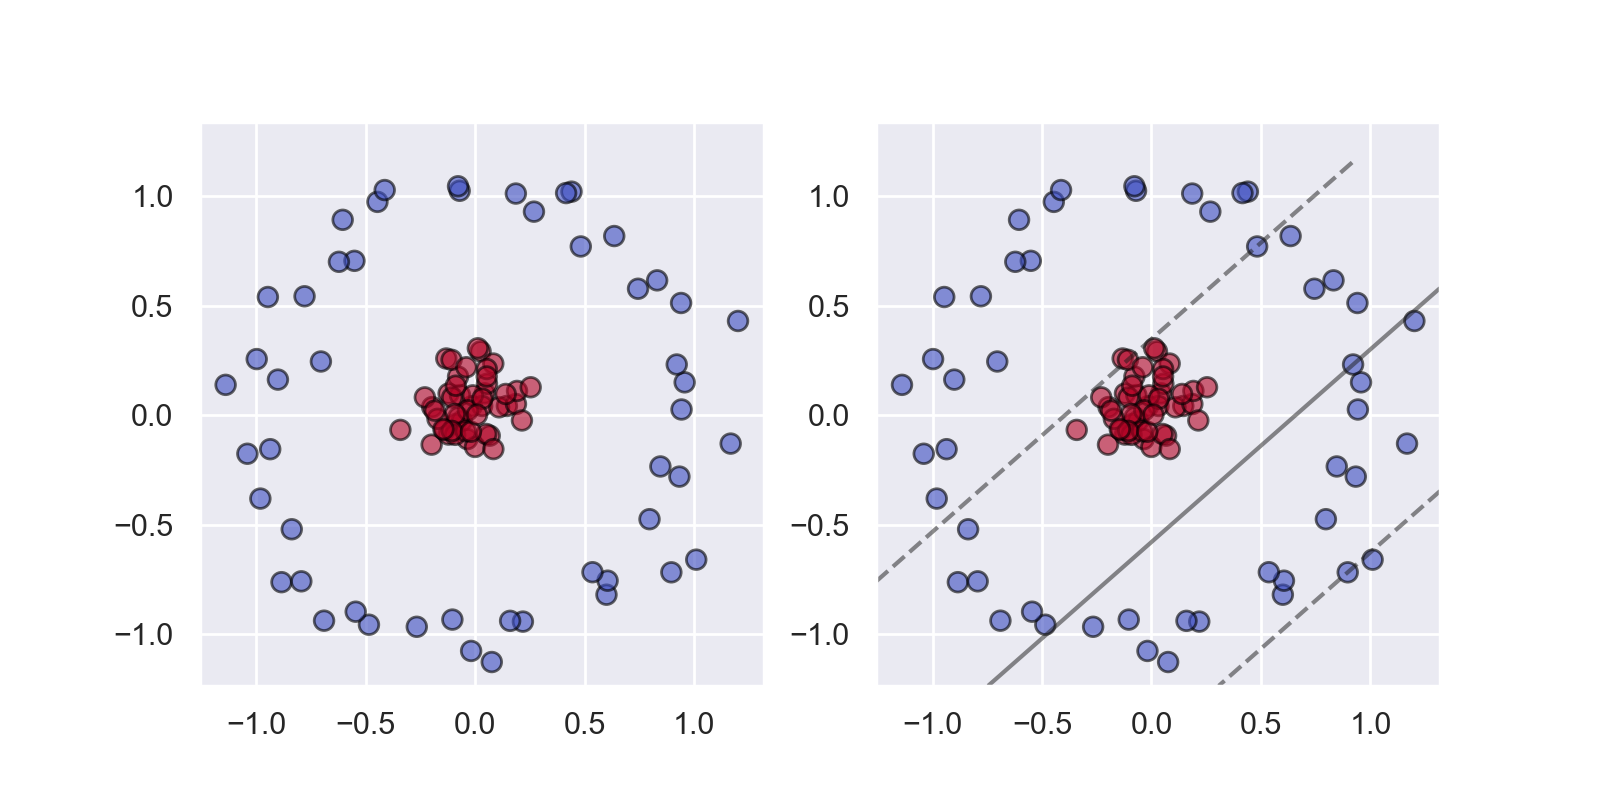

In [68]:
from sklearn.datasets import make_circles

# create dataset
X, y = make_circles(100, factor=.1, noise=.1, random_state=3)

# vreate and train classifier
clf = SVC(kernel='linear').fit(X, y)

# show classification results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plt.axis('square')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.axis('square');

<div><font face="XB Zar" size=5><div dir=rtl>

#### Kernel
    
<div>

<div><font face="XB Zar" size=5><div dir=rtl>

##### RBF Kernel
    
<div>

<IPython.core.display.Javascript object>


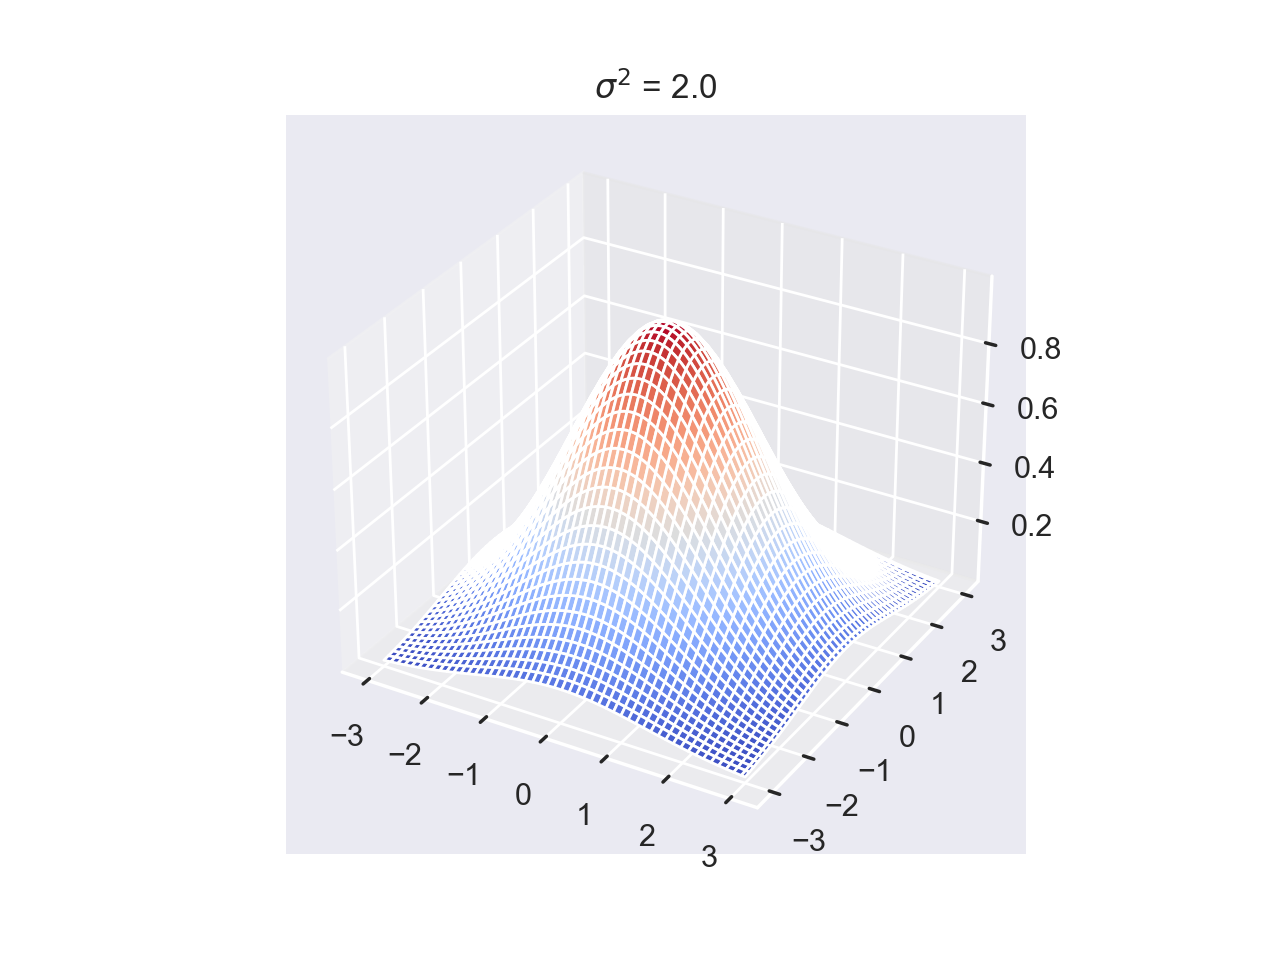

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

sigma2 = 2.0
R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
plt.show()

In [88]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

<IPython.core.display.Javascript object>


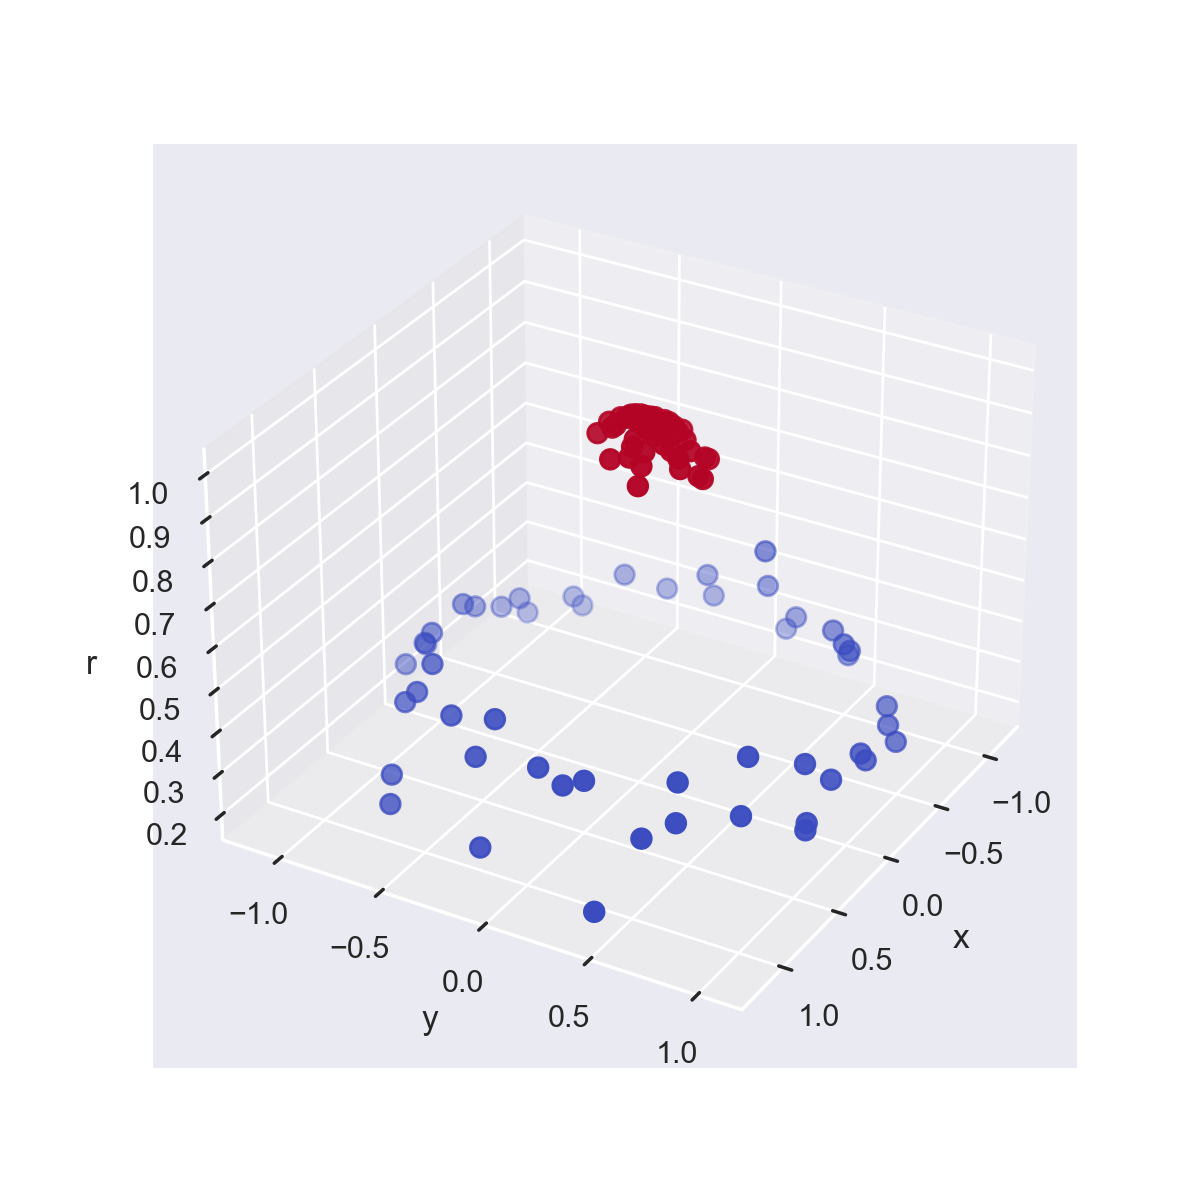

In [89]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='coolwarm')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

<IPython.core.display.Javascript object>


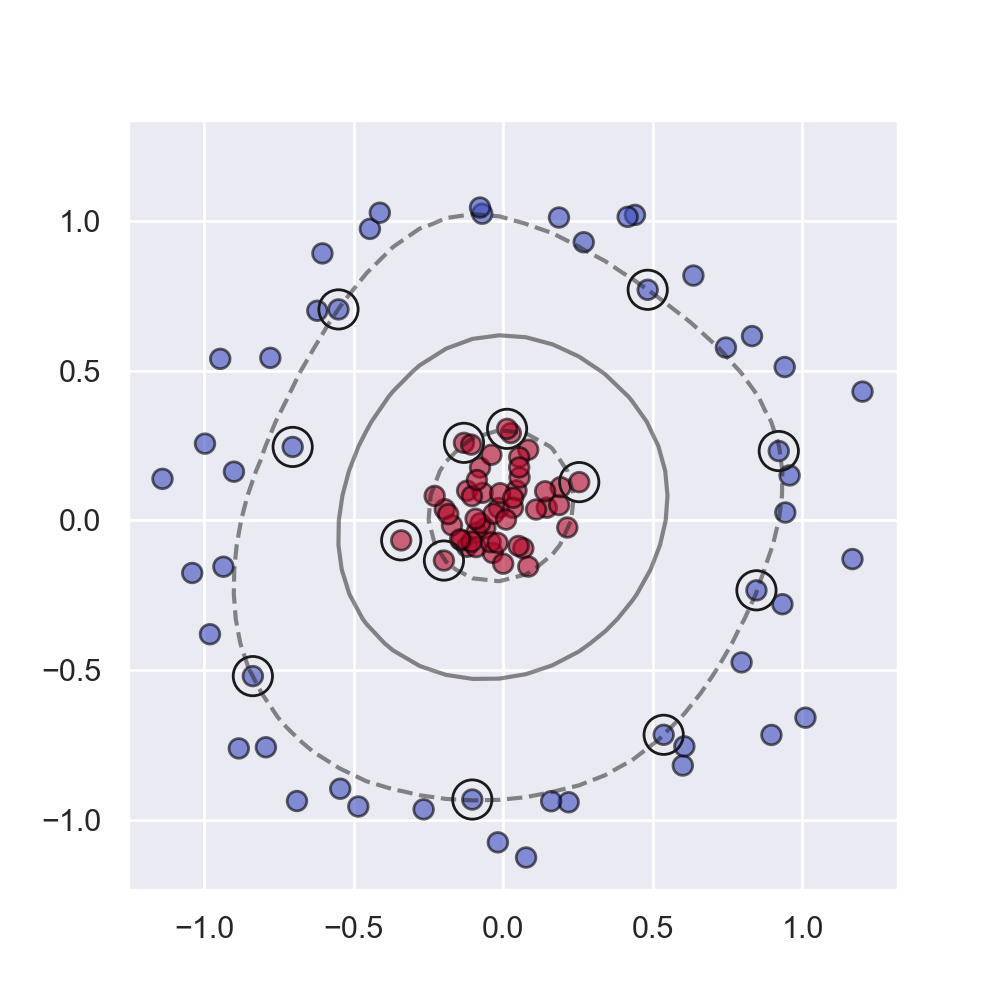

In [90]:
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X, y)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');
plt.axis('square')
plt.show()

# SVM & Selection

In [93]:
%matplotlib nbagg

from ipywidgets import interact, FloatLogSlider, Checkbox

from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV




def make_spiral(density=1, max_radius=6.5, c=0):
    """ Generate spiral dataset.
    
    Arguments:
        density (int)  : Density of the points
        maxRadius (float) : Maximum radius of the spiral
        c (int) : Class of this spiral
    
    Returns:
        array: Return spiral data and its class
    """
    
    # Spirals data and labels
    data, labels = [], []

    # Number of interior data points to generate
    N = 96 * density 

    # Generate points
    for i in range(0, N):
        angle = (i * math.pi) / (16 * density)
        # Radius is the maximum radius * the fraction of iterations left
        radius = max_radius * ((104 * density) - i) / (104 * density)

        # Get x and y coordinates
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)

        data.append([x, y])
        labels.append([c])

    return data, labels

def make_spirals(density=1, max_radius=6.5):
    """ Generate two class spiral dataset.

    Arguments:
        density (int)  : Density of the points
        maxRadius (float) : Maximum radius of the spiral
    Returns:
        array: Return spirals data and its class
    """
    data , labels = [], []

    # First spirals data and class
    data1, labels1 = make_spiral(density, max_radius)

    # Construct complete two spirals dataset
    for d in data1:
        data.append(d)  # First spirals coordinate
        data.append([-d[0], -d[1]])  # Second spirals coordinate

    # Construct complete two spirals classes
    for lbl in labels1:
        labels.append(lbl)  # First spirals class
        labels.append([1])  # Second spirals class

    return np.array(data), np.array(labels).ravel()

## Spiral Dataset

<IPython.core.display.Javascript object>


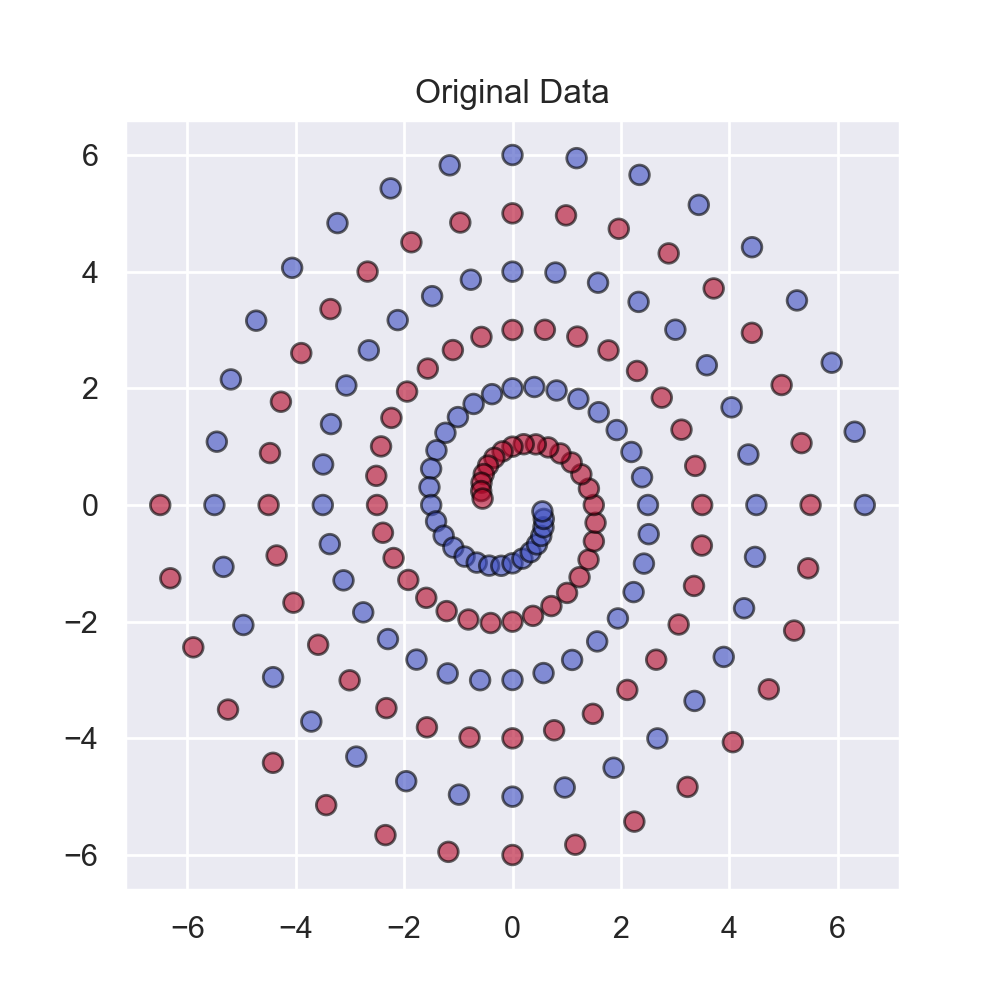

In [95]:
X, y = make_spirals()

# Plot spirals
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.6)
plt.title("Original Data")
plt.show()

### Non-linear SVM using Gaussian Kernels (RBF)

<IPython.core.display.Javascript object>


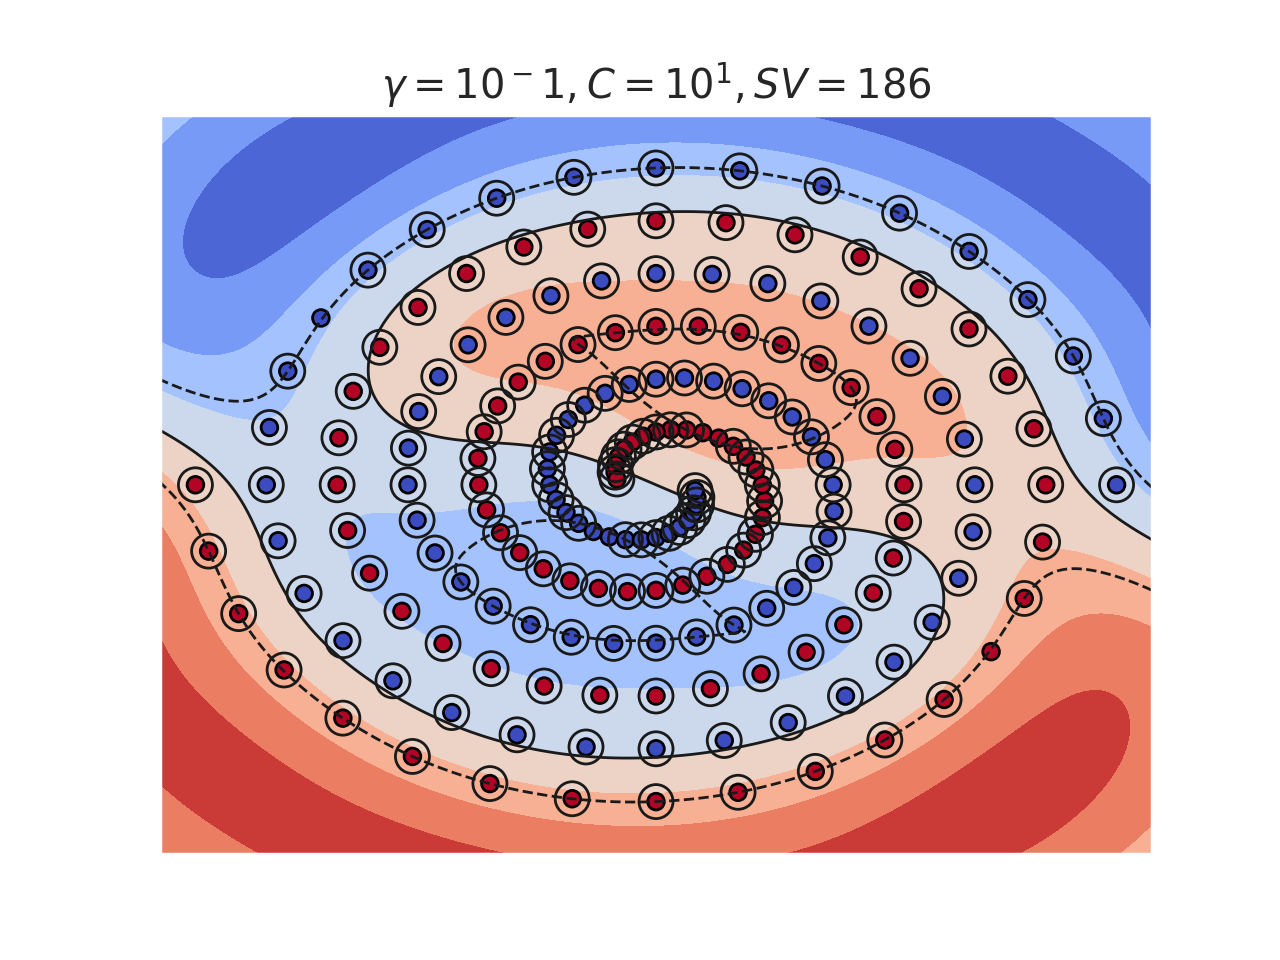

interactive(children=(FloatLogSlider(value=10.0, description='C:', max=5.0, min=-3.0, step=1.0), FloatLogSlide…

In [96]:
fig, ax = plt.subplots(1)

X1, X2 = np.meshgrid(np.linspace(-7, 7, 200), np.linspace(-7, 7, 200))

def update_plot(C, gamma, show_svs, show_levels):
    ax.clear()
    
    # create and train SVM classifier
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X, y)
    sv = clf.support_vectors_
    
    # compute contours
    Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # visualize parameter's effect on decision function
    ax.contourf(X1, X2, Z, cmap=plt.cm.coolwarm)
    
    # plot decision boundaries
    if show_levels:
        ax.contour(X1, X2, Z, linewidths=1, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    
    # plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', cmap=plt.cm.coolwarm, alpha=1.0)
    
    # plot support vectors
    if show_svs:
        sv = clf.support_vectors_
        ax.scatter(sv[:, 0], sv[:, 1], s=150, facecolors='none', edgecolors='k')
    
    title = "$\gamma = 10^{:1.0g}, C = 10^{:1.0g}, SV = {:d}$"
    ax.set_title(title.format(np.log10(gamma), np.log10(C), len(sv)), size='large')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()


C = FloatLogSlider(value=10, base=10, min=-3, max=5, step=1, description='C:')
gamma = FloatLogSlider(value=1, base=10, min=-3, max=5, step=1, description='gamma:')
show_svs = Checkbox(value=False, description='Show Support Vectors')
show_levels = Checkbox(value=True, description='Show Levels')

f = interact(update_plot, C=C, gamma=gamma, show_svs=show_svs, show_levels=show_levels)

### Split data for validation: K-Fold cross validation

In [97]:
X1 = np.random.randn(10, 2)

cv = KFold(n_splits=5)

for train_idx, val_idx in cv.split(X1):
    print("Train = {} | Validation ={}".format(train_idx, val_idx))

Train = [2 3 4 5 6 7 8 9] | Validation =[0 1]
Train = [0 1 4 5 6 7 8 9] | Validation =[2 3]
Train = [0 1 2 3 6 7 8 9] | Validation =[4 5]
Train = [0 1 2 3 4 5 8 9] | Validation =[6 7]
Train = [0 1 2 3 4 5 6 7] | Validation =[8 9]


In [98]:
X1 = np.random.randn(9, 2)
y1 = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])

cv = KFold(n_splits=3)

for trn_idx, val_idx in cv.split(X1, y1):
    print("Train={} | Valid={} | Labels={}, {}".format(trn_idx, val_idx, y1[trn_idx], y1[val_idx]))

Train=[3 4 5 6 7 8] | Valid=[0 1 2] | Labels=[1 1 1 1 1 1], [0 0 0]
Train=[0 1 2 6 7 8] | Valid=[3 4 5] | Labels=[0 0 0 1 1 1], [1 1 1]
Train=[0 1 2 3 4 5] | Valid=[6 7 8] | Labels=[0 0 0 1 1 1], [1 1 1]


### Train classifiers


In [99]:
# 1: split data to train and validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2: specify range of hyper-parameters
C_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
gamma_range = np.logspace(-3, 5, 9)     # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
param_grid = dict(gamma=gamma_range, C=C_range)

# 3: create classifier
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

# 4: Train
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 1.0} with a score of 0.83


<IPython.core.display.Javascript object>


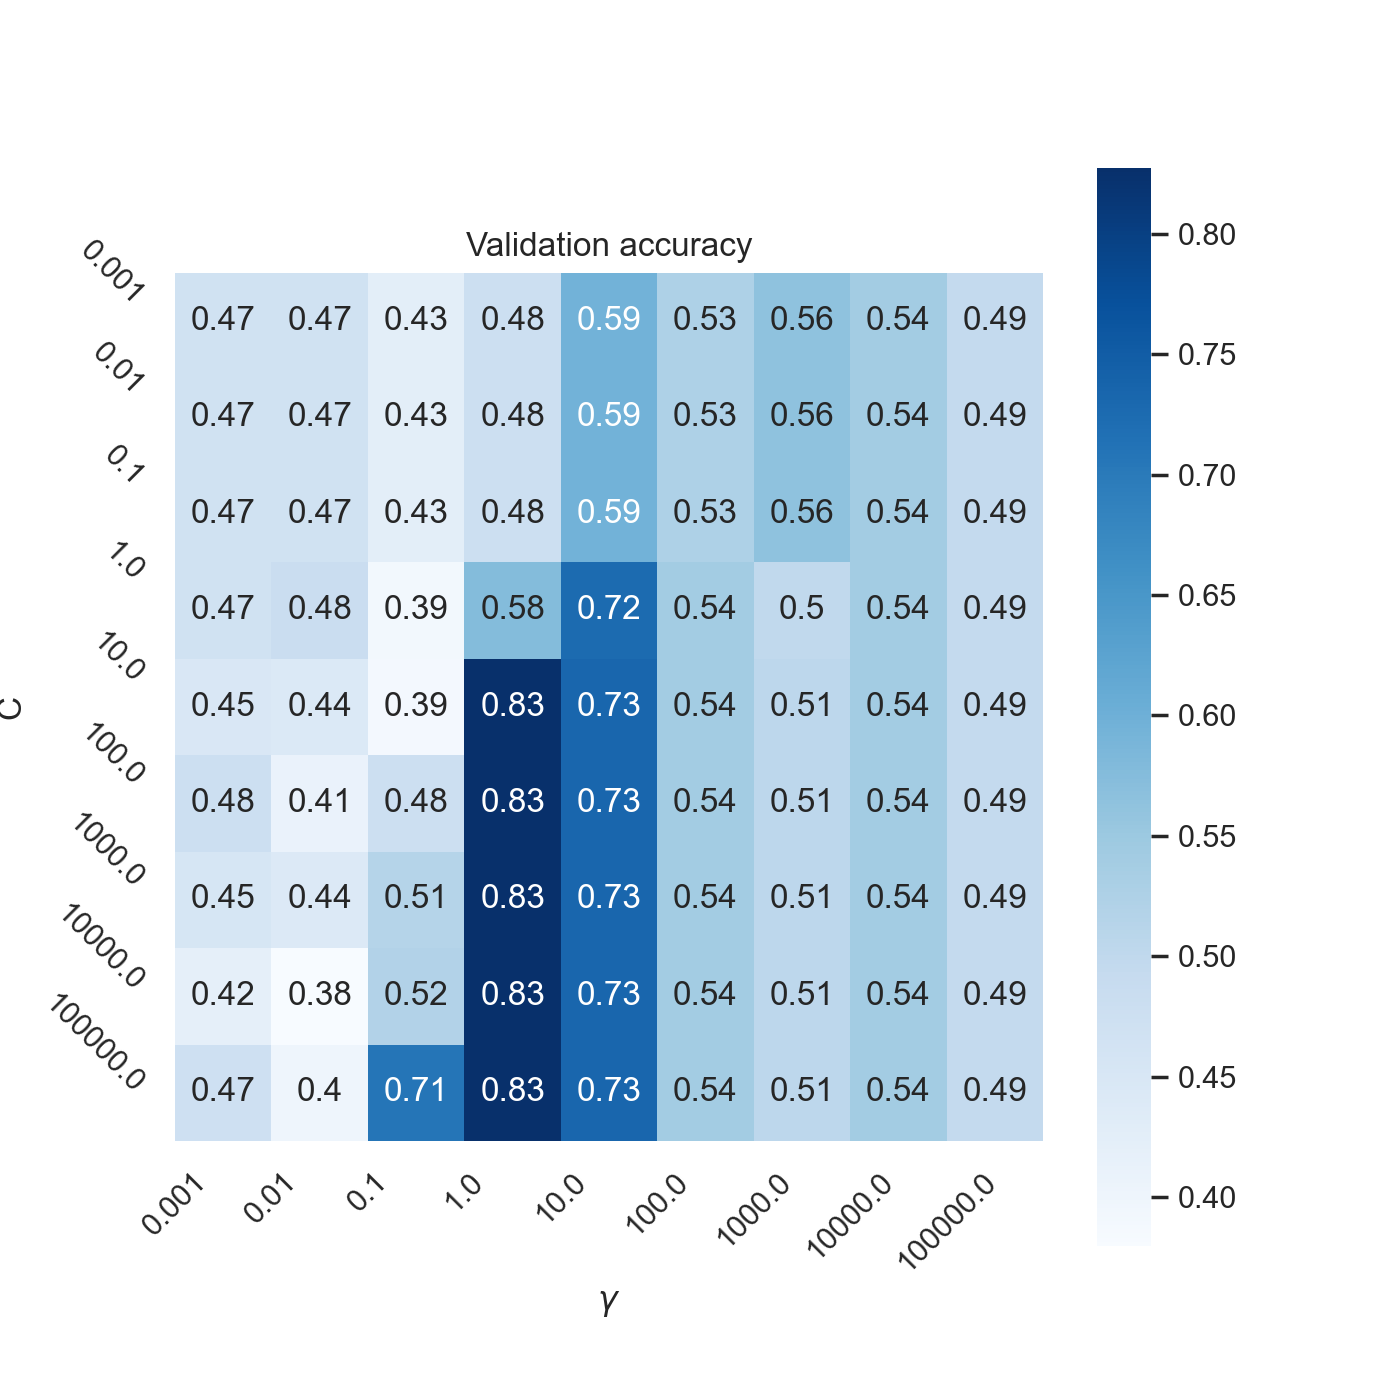

In [100]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(7, 7))

# Draw heatmap of the validation accuracy as a function of gamma and C
sns.heatmap(scores, annot=True, cmap='Blues', square=True)

plt.xlabel('$\gamma$')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range, rotation=-45)
plt.title('Validation accuracy')
plt.show()

### Visualization

draw visualization of parameter effects

In [101]:
C_range = [0.1, 10, 1000]
gamma_range = [0.1, 1, 10]

classifiers = []

for C in C_range:
    for gamma in gamma_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((clf, C, gamma))

<IPython.core.display.Javascript object>


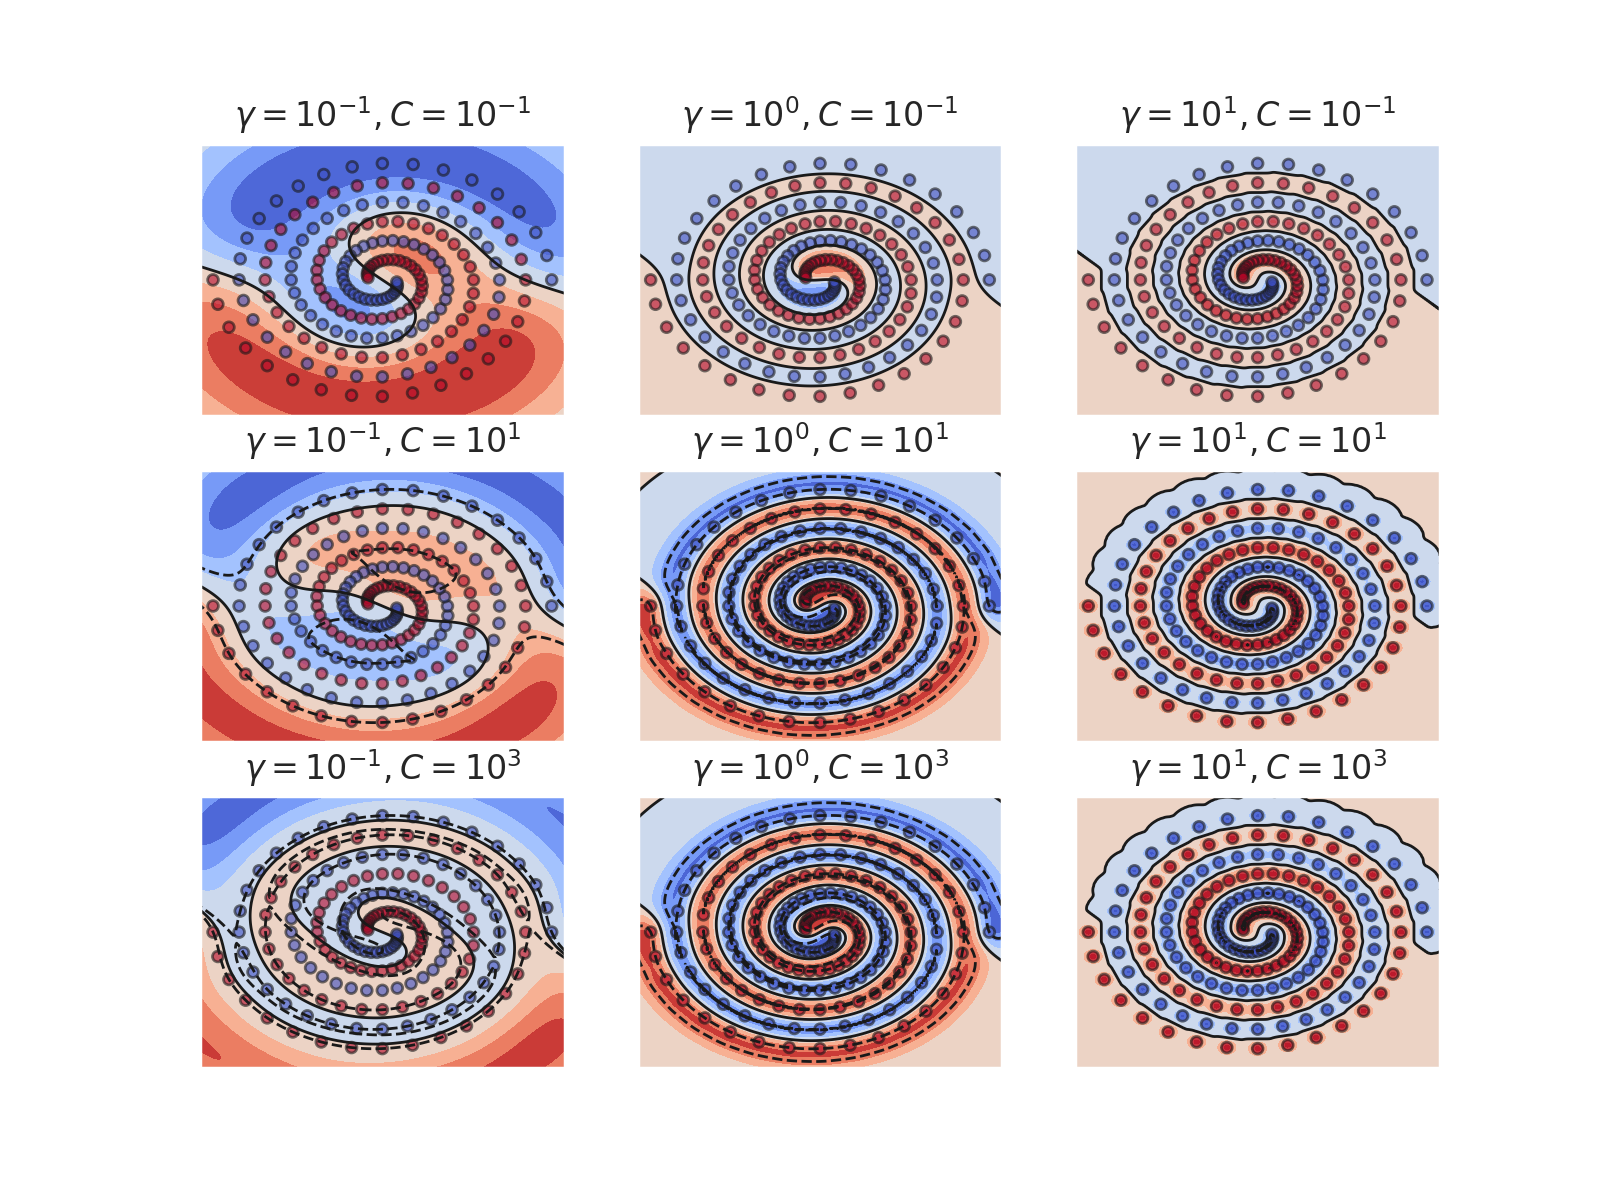

In [102]:
plt.figure(figsize=(8, 6))

X1, X2 = np.meshgrid(np.linspace(-7, 7, 200), np.linspace(-7, 7, 200))

for i, (clf, C, gamma) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), i + 1)
    plt.title("$\gamma = 10^{%d}, C = 10^{%d}$" % (np.log10(gamma), np.log10(C)))

    # visualize parameter's effect on decision function
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm)
    plt.contour(X1, X2, Z, linewidths=1, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], s=15, c=y, edgecolors='k', cmap=plt.cm.coolwarm, alpha=0.6)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
plt.show()